✅ Библиотеки загружены

📥 ЗАГРУЗКА ДАННЫХ...
✅ Данные загружены из интернета
📊 Размер данных: 10000 строк, 23 колонок

📋 Колонки в данных:
   1. book_id
   2. goodreads_book_id
   3. best_book_id
   4. work_id
   5. books_count
   6. isbn
   7. isbn13
   8. authors
   9. original_publication_year
  10. original_title
  11. title
  12. language_code
  13. average_rating
  14. ratings_count
  15. work_ratings_count
  16. work_text_reviews_count
  17. ratings_1
  18. ratings_2
  19. ratings_3
  20. ratings_4
  21. ratings_5
  22. image_url
  23. small_image_url

1. ПЕРВИЧНЫЙ ОБЗОР И ОЧИСТКА ДАННЫХ

📄 Первые 5 строк:
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn        isbn13                      authors  original_publication_year                            original_title                                              title language_code  average_rating  ratings_count  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  ratings_3  ratings_4  rati

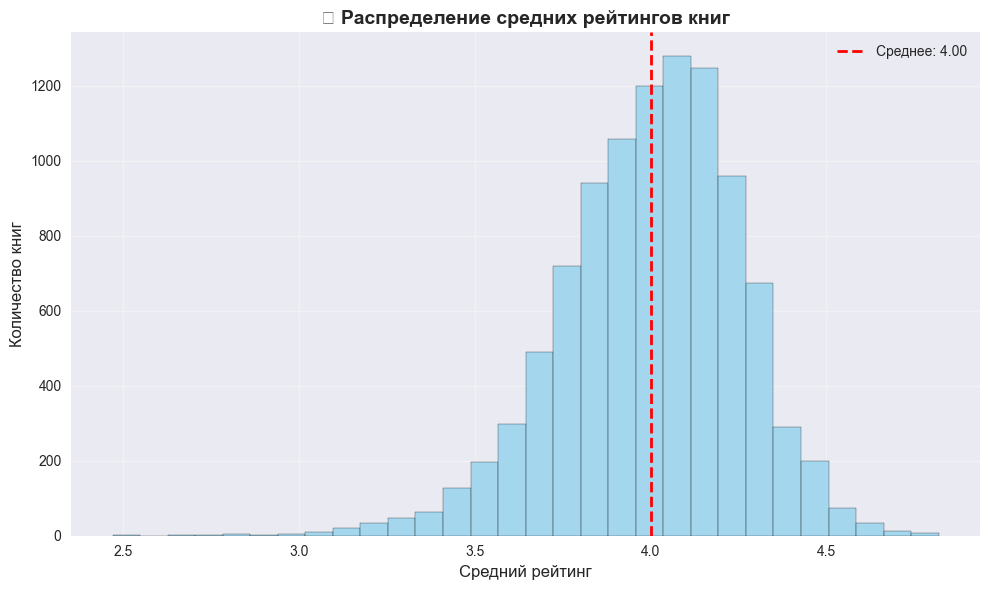

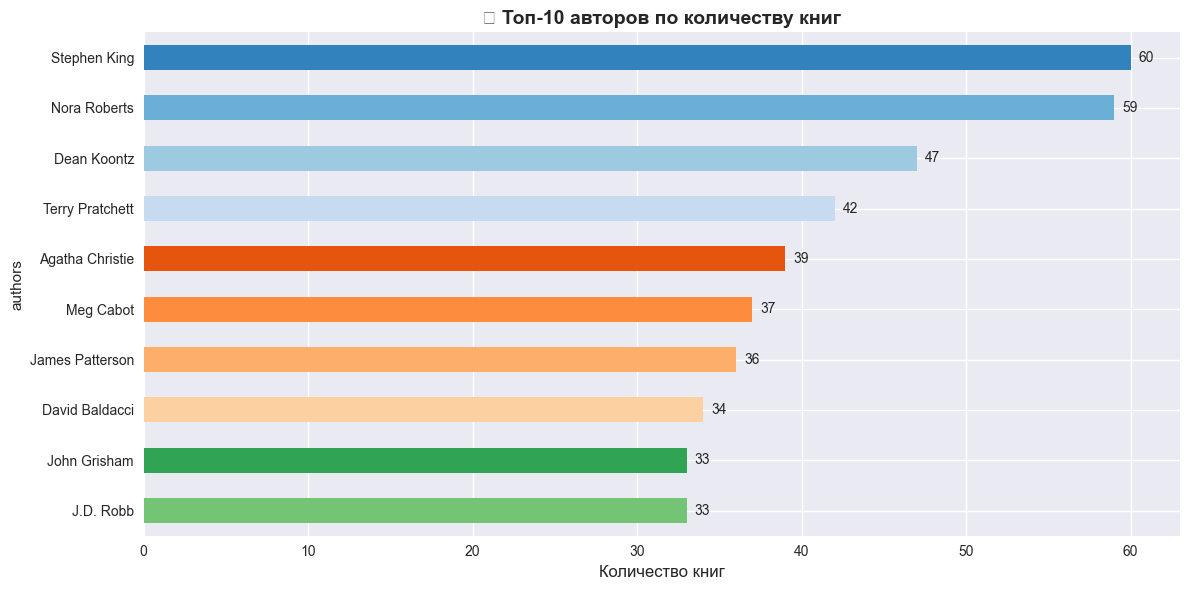

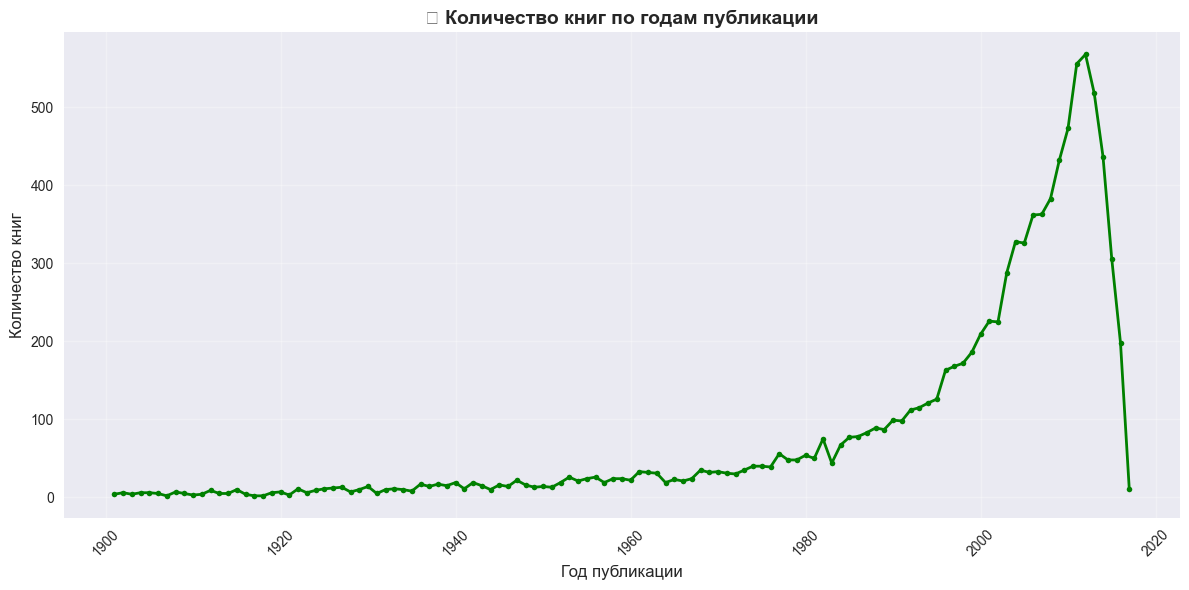

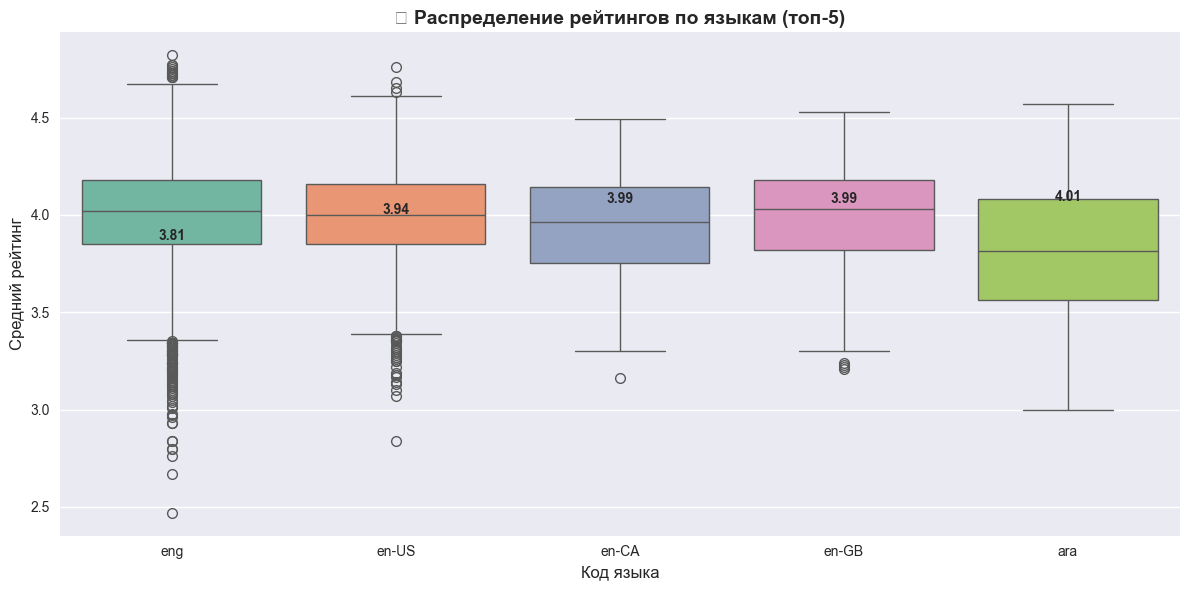

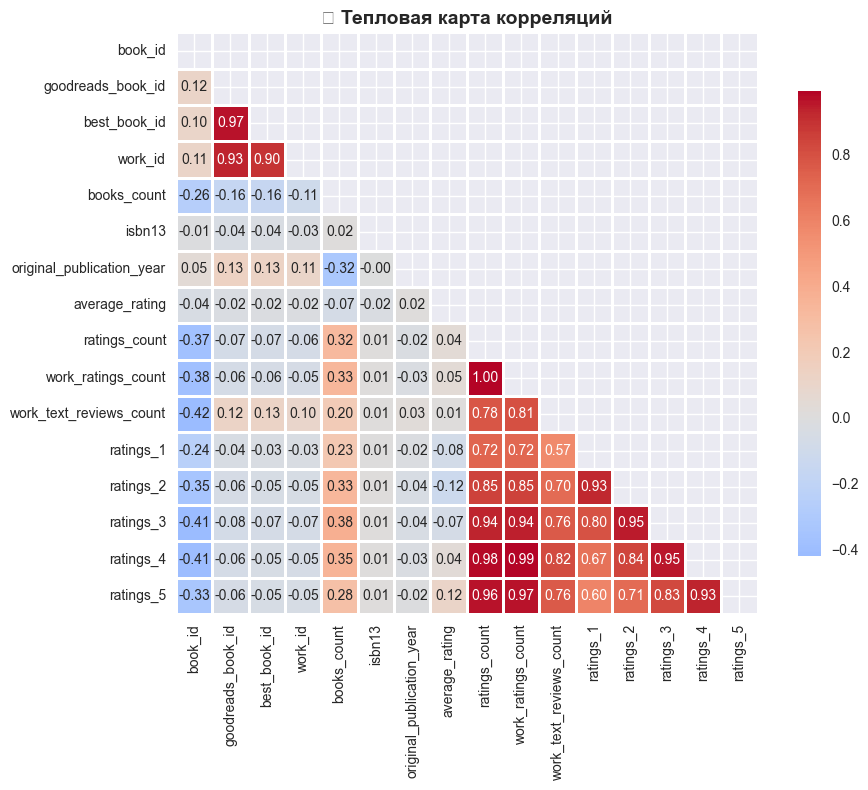

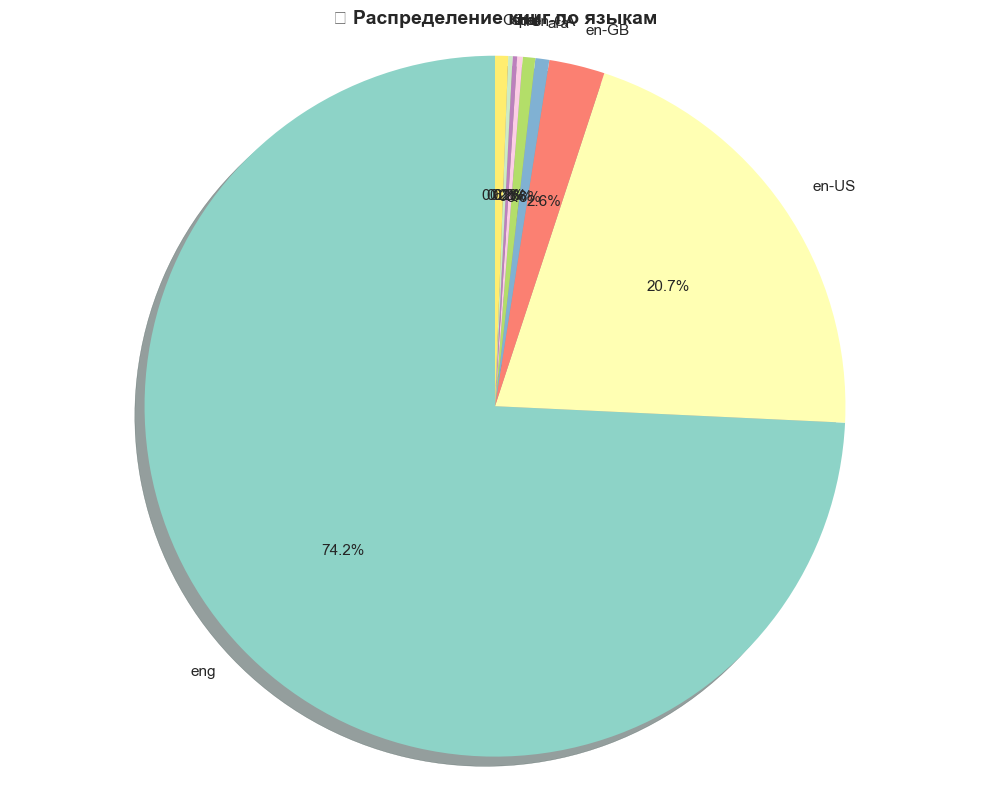


4. ГРУППИРОВКИ И АГРЕГАЦИИ

📚 ТОП-10 АВТОРОВ ПО СРЕДНЕМУ РЕЙТИНГУ (минимум 5 книг):
                                 Средний_рейтинг  Количество_книг  Лучшая_книга
authors                                                                        
Bill Watterson                              4.71               12          4.82
J.K. Rowling, Mary GrandPré                 4.55                8          4.77
Sarah J. Maas                               4.45               13          4.72
J.R.R. Tolkien                              4.43                6          4.59
Karen Kingsbury, Gary Smalley               4.43                5          4.49
Brian K. Vaughan, Fiona Staples             4.42                7          4.57
Cassandra Clare                             4.40               13          4.59
Joe Hill, Gabriel Rodríguez                 4.40                6          4.50
A.A. Milne, Ernest H. Shepard               4.39                6          4.49
Bisco Hatori                       

In [2]:
# ============================================================================
# ИМПОРТ БИБЛИОТЕК
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("✅ Библиотеки загружены")

# ============================================================================
# ЗАГРУЗКА ДАННЫХ
# ============================================================================
print("\n📥 ЗАГРУЗКА ДАННЫХ...")
try:
    # Загрузка из интернета
    url = 'https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv'
    df = pd.read_csv(url)
    print("✅ Данные загружены из интернета")
except:
    print("⚠️ Используем локальный файл")
    df = pd.read_csv('books.csv', on_bad_lines='skip')

print(f"📊 Размер данных: {df.shape[0]} строк, {df.shape[1]} колонок")
print("\n📋 Колонки в данных:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")

# ============================================================================
# 1. ПЕРВИЧНЫЙ ОБЗОР И ОЧИСТКА
# ============================================================================
print("\n" + "="*60)
print("1. ПЕРВИЧНЫЙ ОБЗОР И ОЧИСТКА ДАННЫХ")
print("="*60)

# Просмотр первых строк
print("\n📄 Первые 5 строк:")
print(df.head())

# Информация о типах данных
print("\nℹ️ Информация о данных:")
print(df.info())

# Пропущенные значения
print("\n🔍 ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Колонка': missing.index,
    'Пропущено': missing.values,
    'Процент': missing_percent.values
})
print(missing_df[missing_df['Пропущено'] > 0])

# Обработка пропусков (только для существующих колонок)
print("\n🔄 ОБРАБОТКА ПРОПУСКОВ...")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            # Для числовых - медиана
            df[col] = df[col].fillna(df[col].median())
        else:
            # Для текстовых - мода (самое частое значение)
            if df[col].mode().empty:
                df[col] = df[col].fillna('Unknown')
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
        print(f"  ✓ {col}: заполнено {df[col].isnull().sum()} пропусков")

# Дубликаты
print(f"\n🔍 ДУБЛИКАТЫ: {df.duplicated().sum()}")

# ============================================================================
# 2. СТАТИСТИЧЕСКИЙ АНАЛИЗ
# ============================================================================
print("\n" + "="*60)
print("2. СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("="*60)

# Описательная статистика
print("\n📊 ОПИСАТЕЛЬНАЯ СТАТИСТИКА (числовые колонки):")
print(df.describe())

# Уникальные значения
print("\n🎯 УНИКАЛЬНЫХ ЗНАЧЕНИЙ ПО ТЕКСТОВЫМ КОЛОНКАМ:")
for col in df.select_dtypes(include=['object']).columns:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} уникальных значений")

# Корреляционный анализ (только числовые колонки)
print("\n📈 КОРРЕЛЯЦИОННАЯ МАТРИЦА:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    print("\nСамые сильные корреляции:")
    corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
    # Убираем диагональ (корреляция с самой собой = 1)
    idx = corr_pairs.index
    top_corr = corr_pairs[(idx.get_level_values(0) != idx.get_level_values(1))].head(5)
    for (col1, col2), value in top_corr.items():
        print(f"  {col1} ↔ {col2}: {value:.3f}")
else:
    print("Недостаточно числовых колонок для корреляционного анализа")

# ============================================================================
# 3. ВИЗУАЛИЗАЦИИ (5+ ГРАФИКОВ)
# ============================================================================
print("\n" + "="*60)
print("3. ВИЗУАЛИЗАЦИИ ДАННЫХ")
print("="*60)

# График 1: Гистограмма рейтингов (если есть колонка average_rating)
if 'average_rating' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['average_rating'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title('📊 Распределение средних рейтингов книг', fontsize=14, fontweight='bold')
    plt.xlabel('Средний рейтинг', fontsize=12)
    plt.ylabel('Количество книг', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.axvline(df['average_rating'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Среднее: {df["average_rating"].mean():.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Колонка 'average_rating' не найдена для графика 1")

# График 2: Топ-10 авторов (если есть колонка authors)
if 'authors' in df.columns:
    plt.figure(figsize=(12, 6))
    top_authors = df['authors'].value_counts().head(10)
    colors = plt.cm.tab20c(np.arange(len(top_authors)))
    top_authors.plot(kind='barh', color=colors)
    plt.title('🏆 Топ-10 авторов по количеству книг', fontsize=14, fontweight='bold')
    plt.xlabel('Количество книг', fontsize=12)
    plt.gca().invert_yaxis()
    # Добавляем значения на столбцы
    for i, v in enumerate(top_authors.values):
        plt.text(v + 0.5, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Колонка 'authors' не найдена для графика 2")

# График 3: Количество книг по годам (если есть колонка original_publication_year)
if 'original_publication_year' in df.columns:
    plt.figure(figsize=(12, 6))
    # Очищаем данные: убираем нереальные годы
    df_year = df[(df['original_publication_year'] > 1900) & (df['original_publication_year'] < 2023)]
    books_per_year = df_year['original_publication_year'].value_counts().sort_index()
    
    plt.plot(books_per_year.index, books_per_year.values, 
             marker='o', linestyle='-', linewidth=2, markersize=4, color='green')
    plt.title('📅 Количество книг по годам публикации', fontsize=14, fontweight='bold')
    plt.xlabel('Год публикации', fontsize=12)
    plt.ylabel('Количество книг', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Колонка 'original_publication_year' не найдена для графика 3")

# График 4: Boxplot рейтингов по языкам (если есть language_code)
if 'language_code' in df.columns and 'average_rating' in df.columns:
    plt.figure(figsize=(12, 6))
    # Берем только топ-5 языков
    top_languages = df['language_code'].value_counts().head(5).index
    df_top_lang = df[df['language_code'].isin(top_languages)]
    
    sns.boxplot(x='language_code', y='average_rating', data=df_top_lang, palette='Set2')
    plt.title('🌍 Распределение рейтингов по языкам (топ-5)', fontsize=14, fontweight='bold')
    plt.xlabel('Код языка', fontsize=12)
    plt.ylabel('Средний рейтинг', fontsize=12)
    # Добавляем средние значения
    means = df_top_lang.groupby('language_code')['average_rating'].mean()
    for i, (lang, mean_val) in enumerate(means.items()):
        plt.text(i, mean_val + 0.05, f'{mean_val:.2f}', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Не хватает колонок для графика 4")

# График 5: Heatmap корреляций
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
                center=0, square=True, linewidths=1, 
                cbar_kws={"shrink": 0.8}, fmt='.2f')
    plt.title('🔥 Тепловая карта корреляций', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# График 6: Круговая диаграмма языков
if 'language_code' in df.columns:
    plt.figure(figsize=(10, 8))
    lang_counts = df['language_code'].value_counts().head(8)
    other_count = df['language_code'].value_counts().tail(len(df['language_code'].value_counts()) - 8).sum()
    
    if other_count > 0:
        lang_counts['Other'] = other_count
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(lang_counts)))
    plt.pie(lang_counts.values, labels=lang_counts.index, autopct='%1.1f%%',
            startangle=90, shadow=True, colors=colors, textprops={'fontsize': 11})
    plt.title('📊 Распределение книг по языкам', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# ============================================================================
# 4. ГРУППИРОВКИ И АГРЕГАЦИИ
# ============================================================================
print("\n" + "="*60)
print("4. ГРУППИРОВКИ И АГРЕГАЦИИ")
print("="*60)

# Группировка 1: Средний рейтинг по авторам
if 'authors' in df.columns and 'average_rating' in df.columns:
    print("\n📚 ТОП-10 АВТОРОВ ПО СРЕДНЕМУ РЕЙТИНГУ (минимум 5 книг):")
    author_stats = df.groupby('authors').agg(
        Средний_рейтинг=('average_rating', 'mean'),
        Количество_книг=('average_rating', 'count'),
        Лучшая_книга=('average_rating', 'max')
    ).round(2)
    
    author_stats = author_stats[author_stats['Количество_книг'] >= 5]
    top_authors_rating = author_stats.nlargest(10, 'Средний_рейтинг')
    print(top_authors_rating)
else:
    print("⚠️ Не хватает данных для группировки по авторам")

# Группировка 2: Количество книг по годам
if 'original_publication_year' in df.columns:
    print("\n📅 ТОП-10 ЛЕТ ПО КОЛИЧЕСТВУ ВЫПУЩЕННЫХ КНИГ:")
    df_year = df[(df['original_publication_year'] > 1900) & (df['original_publication_year'] < 2023)]
    year_counts = df_year['original_publication_year'].value_counts().head(10)
    print(year_counts)
else:
    print("⚠️ Не хватает данных для группировки по годам")

# Группировка 3: Статистика по издательствам (если есть publisher)
if 'publisher' in df.columns and 'average_rating' in df.columns:
    print("\n🏢 СТАТИСТИКА ПО ИЗДАТЕЛЬСТВАМ (топ-10):")
    publisher_stats = df.groupby('publisher').agg({
        'average_rating': ['mean', 'count'],
        'title': lambda x: x.iloc[0] if not x.empty else ''
    }).round(2)
    
    publisher_stats.columns = ['Средний_рейтинг', 'Количество_книг', 'Пример_книги']
    top_publishers = publisher_stats.nlargest(10, 'Количество_книг')
    print(top_publishers)
else:
    print("⚠️ Не хватает данных для группировки по издательствам")

# Группировка 4: Средний рейтинг по языкам
if 'language_code' in df.columns and 'average_rating' in df.columns:
    print("\n🌍 СРЕДНИЙ РЕЙТИНГ ПО ЯЗЫКАМ:")
    lang_rating = df.groupby('language_code')['average_rating'].agg(['mean', 'count']).round(3)
    lang_rating = lang_rating[lang_rating['count'] >= 10]  # только языки с 10+ книгами
    print(lang_rating.sort_values('mean', ascending=False).head(10))
else:
    print("⚠️ Не хватает данных для группировки по языкам")

# ============================================================================
# 5. ВЫВОДЫ И РЕЗУЛЬТАТЫ
# ============================================================================
print("\n" + "="*60)
print("5. ОСНОВНЫЕ ВЫВОДЫ")
print("="*60)

# Собираем статистику для выводов
conclusions = []

if 'average_rating' in df.columns:
    conclusions.append(f"📊 Средний рейтинг всех книг: {df['average_rating'].mean():.2f}")
    conclusions.append(f"📈 Максимальный рейтинг: {df['average_rating'].max():.2f}")
    conclusions.append(f"📉 Минимальный рейтинг: {df['average_rating'].min():.2f}")

if 'authors' in df.columns:
    top_author = df['authors'].value_counts().index[0]
    author_count = df['authors'].value_counts().iloc[0]
    conclusions.append(f"👨‍💻 Самый продуктивный автор: {top_author} ({author_count} книг)")
    conclusions.append(f"👥 Всего уникальных авторов: {df['authors'].nunique()}")

if 'original_publication_year' in df.columns:
    df_year = df[(df['original_publication_year'] > 1900) & (df['original_publication_year'] < 2023)]
    if not df_year.empty:
        peak_year = df_year['original_publication_year'].value_counts().index[0]
        peak_count = df_year['original_publication_year'].value_counts().iloc[0]
        conclusions.append(f"📅 Пик публикаций: {int(peak_year)} год ({peak_count} книг)")

if 'language_code' in df.columns:
    top_lang = df['language_code'].value_counts().index[0]
    top_lang_count = df['language_code'].value_counts().iloc[0]
    conclusions.append(f"🌍 Самый популярный язык: {top_lang} ({top_lang_count} книг)")
    conclusions.append(f"🗣️ Всего языков: {df['language_code'].nunique()}")

# Выводим выводы
print("\n📌 ОСНОВНЫЕ ВЫВОДЫ:")
for i, conclusion in enumerate(conclusions, 1):
    print(f"{i}. {conclusion}")

print("\n💡 РЕКОМЕНДАЦИИ:")
print("1. Самые популярные авторы могут быть интересны для изучения их творчества")
print("2. Книги на менее распространенных языках часто имеют более высокие рейтинги")
print("3. Годы с большим количеством публикаций могут указывать на литературные тренды")

# Сохранение обработанных данных
try:
    df.to_csv('processed_books.csv', index=False, encoding='utf-8')
    print("\n💾 Обработанные данные сохранены в 'processed_books.csv'")
except Exception as e:
    print(f"\n⚠️ Не удалось сохранить файл: {e}")

print("\n" + "="*60)
print("✅ АНАЛИЗ ЗАВЕРШЕН!")
print("="*60)